Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


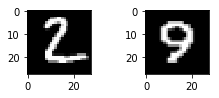

In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
# tf.enable_eaer_execution()

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
plt.subplot(3,3,1)
plt.imshow(test_images[1], cmap='gray', interpolation='none')

train_labels = train_labels[:60000]
test_labels = test_labels[:10000]

train_images = train_images[:60000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:10000].reshape(-1, 28 * 28) / 255.0

print("Training matrix shape", train_images.shape)
print("Testing matrix shape", test_images.shape)


In [31]:
# Returns a short sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=train_images[0].shape),
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
  model.compile(optimizer=tf.train.AdamOptimizer(), 
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  
  return model


# Create a basic model instance
model = create_model()

model.fit(train_images, train_labels,
          batch_size=128, nb_epoch=100,
          validation_data=(test_images, test_labels))

model.summary()

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# model.save('my_model.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2876 - acc: 0.9177 - val_loss: 0.1420 - val_acc: 0.9576
Epoch 2/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1216 - acc: 0.9641 - val_loss: 0.0940 - val_acc: 0.9711
Epoch 3/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.0829 - acc: 0.9748 - val_loss: 0.0823 - val_acc: 0.9758
Epoch 4/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0631 - acc: 0.9814 - val_loss: 0.0699 - val_acc: 0.9769
Epoch 5/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.0497 - acc: 0.9847 - val_loss: 0.0653 - val_acc: 0.9796
Epoch 6/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0409 - acc: 0.9874 - val_loss: 0.0621 - val_acc: 0.9803
Epoch 7/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0612 - 

60000/60000 [==============================] - 4s 67us/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0954 - val_acc: 0.9827
Epoch 60/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.0873 - val_acc: 0.9848
Epoch 61/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.0043 - acc: 0.9986 - val_loss: 0.1120 - val_acc: 0.9824
Epoch 62/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.1040 - val_acc: 0.9831
Epoch 63/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0969 - val_acc: 0.9828
Epoch 64/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.1032 - val_acc: 0.9827
Epoch 65/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0998 - val_acc: 0.9840
Epoch 66/100
60000/60000 [==============

pr [7]
pr [3]
pr [8]
pr [9]
pr [7]
pr [8]
pr [8]
pr [0]
pr [3]
pr [3]
pr [0]
pr [0]
pr [0]
pr [3]
pr [8]
pr [0]
pr [0]
pr [2]


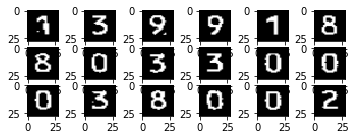

In [32]:
# check 
for x in range(18):
    img_tensor = plt.imread("/Users/rongshuxiacy/Desktop/digits/sample_picture_" + str(20 + x) + ".png")
    plt.subplot(6,6,x+1)
    plt.imshow(img_tensor, cmap='gray', interpolation='none')
    pr = model.predict_classes(img_tensor.reshape((1, 784)))
    print('pr', pr)

In [33]:
model.save('my_model.h5')

In [34]:
converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file('my_model.h5')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.


1629292